# pass@k analysis
This notebook demonstrates how to visualize which model managed to achieve which pass@k value.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + filename)
        df['model'] = filename.replace("_passk_results.csv", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_claude-3-5-sonnet-20240620_passk_results.csv
samples_claude-3-opus-20240229_passk_results.csv
samples_codegemma-7b-instruct-fp16_passk_results.csv
samples_codellama-70b-instruct-q4_0_passk_results.csv
samples_codellama_passk_results.csv
samples_command-r-plus-104b-q4_0_passk_results.csv
samples_deepseek-coder-v2_biabob_passk_results.csv
samples_deepseek-coder-v2_passk_results.csv
samples_gemini-1.5-flash-001_passk_results.csv
samples_gemini-1.5-pro-001_passk_results.csv
samples_gemini-pro_passk_results.csv
samples_gpt-3.5-turbo-1106_passk_results.csv
samples_gpt-4-1106-preview_passk_results.csv
samples_gpt-4-turbo-2024-04-09_passk_results.csv
samples_gpt-4o-2024-05-13_biabob_passk_results.csv
samples_gpt-4o-2024-05-13_passk_results.csv
samples_gpt-4o-mini-2024-07-18_passk_results.csv
samples_llama3-70b-instruct-q4_0_passk_results.csv
samples_llama3-70b-instruct-q8_0_passk_results.csv
samples_llama3-8b-instruct-fp16_passk_results.csv
samples_mistral-nemo_passk_results.csv
sample

In [3]:
df

,Unnamed: 0,pass@1,pass@5,pass@10,model
0,0,0.580702,0.747911,0.789474,claude-3-5-sonnet-20240620
0,0,0.470175,0.654135,0.684211,claude-3-opus-20240229
0,0,0.249123,0.494291,0.578947,codegemma-7b-instruct-fp16
0,0,0.177193,0.497633,0.631579,codellama-70b-instruct-q4_0
0,0,0.087719,0.300543,0.456140,codellama
0,0,0.122807,0.384781,0.526316,command-r-plus-104b-q4_0
0,0,0.352632,0.650515,0.736842,deepseek-coder-v2_biabob
0,0,0.368421,0.642161,0.719298,deepseek-coder-v2
0,0,0.294737,0.448761,0.543860,gemini-1.5-flash-001
0,0,0.459649,0.603801,0.649123,gemini-1.5-pro-001


In [4]:
# Drop the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values("pass@1", ascending=False)
df

,pass@1,pass@5,pass@10,model
0,1.000000,1.000000,1.000000,reference
0,0.580702,0.747911,0.789474,claude-3-5-sonnet-20240620
0,0.528070,0.737260,0.789474,gpt-4o-2024-05-13_biabob
0,0.508772,0.694932,0.754386,gpt-4o-2024-05-13
0,0.473684,0.686090,0.736842,gpt-4-turbo-2024-04-09
0,0.470175,0.654135,0.684211,claude-3-opus-20240229
0,0.464912,0.678850,0.719298,gpt-4-1106-preview
0,0.459649,0.603801,0.649123,gemini-1.5-pro-001
0,0.424561,0.625731,0.684211,gpt-4o-mini-2024-07-18
0,0.368421,0.642161,0.719298,deepseek-coder-v2


In [5]:
# Set the "model" column as the index and then transpose
df_transposed = df.set_index('model').transpose()
df_transposed['k'] = [1,5,10]
df_transposed

model,reference,claude-3-5-sonnet-20240620,gpt-4o-2024-05-13_biabob,gpt-4o-2024-05-13,gpt-4-turbo-2024-04-09,claude-3-opus-20240229,gpt-4-1106-preview,gemini-1.5-pro-001,gpt-4o-mini-2024-07-18,deepseek-coder-v2,...,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,codellama-70b-instruct-q4_0,gemini-pro,mistral-nemo,llama3-8b-instruct-fp16,command-r-plus-104b-q4_0,codellama,k
pass@1,1.0,0.580702,0.528070,0.508772,0.473684,0.470175,0.464912,0.459649,0.424561,0.368421,...,0.243860,0.207018,0.180702,0.177193,0.173684,0.152632,0.142105,0.122807,0.087719,1
pass@5,1.0,0.747911,0.737260,0.694932,0.686090,0.654135,0.678850,0.603801,0.625731,0.642161,...,0.514690,0.485171,0.421540,0.497633,0.353523,0.359649,0.336745,0.384781,0.300543,5
pass@10,1.0,0.789474,0.789474,0.754386,0.736842,0.684211,0.719298,0.649123,0.684211,0.719298,...,0.666667,0.578947,0.508772,0.631579,0.438596,0.508772,0.403509,0.526316,0.456140,10


     pass@1    pass@5   pass@10                             model
0  1.000000  1.000000  1.000000                         reference
0  0.580702  0.747911  0.789474        claude-3-5-sonnet-20240620
0  0.528070  0.737260  0.789474          gpt-4o-2024-05-13_biabob
0  0.508772  0.694932  0.754386                 gpt-4o-2024-05-13
0  0.473684  0.686090  0.736842            gpt-4-turbo-2024-04-09
0  0.470175  0.654135  0.684211            claude-3-opus-20240229
0  0.464912  0.678850  0.719298                gpt-4-1106-preview
0  0.459649  0.603801  0.649123                gemini-1.5-pro-001
0  0.424561  0.625731  0.684211            gpt-4o-mini-2024-07-18
0  0.368421  0.642161  0.719298                 deepseek-coder-v2
0  0.359649  0.612016  0.719298          llama3-70b-instruct-q8_0
0  0.352632  0.650515  0.736842          deepseek-coder-v2_biabob
0  0.350877  0.615915  0.719298          llama3-70b-instruct-q4_0
0  0.333333  0.553676  0.701754                gpt-3.5-turbo-1106
0  0.29473

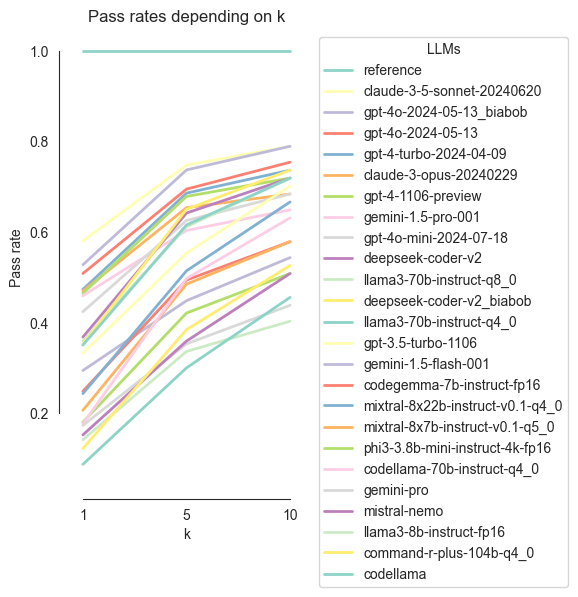

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


# Assuming 'k' is an index after transposition, let's reset the index first if not already done
if 'k' not in df_transposed.columns:
    df_transposed.reset_index(inplace=True)
print(df)
# Separate 'k' column for x-axis
x = df_transposed['k']
vals = df_transposed.drop('k', axis=1)
fig = plt.figure(figsize=(6,6))
g = sns.lineplot(vals, palette="Set3", dashes=False, linewidth=2)
sns.despine(offset=10, trim=True);
g.set_xticklabels(x)

# Adding plot decorations
plt.xlabel('k')
plt.ylabel('Pass rate')
plt.title('Pass rates depending on k')
plt.legend(title='LLMs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("../docs/paper/pass_k_llms_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df_transposed.drop('k', axis=1)

model,reference,claude-3-5-sonnet-20240620,gpt-4o-2024-05-13_biabob,gpt-4o-2024-05-13,gpt-4-turbo-2024-04-09,claude-3-opus-20240229,gpt-4-1106-preview,gemini-1.5-pro-001,gpt-4o-mini-2024-07-18,deepseek-coder-v2,...,codegemma-7b-instruct-fp16,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,codellama-70b-instruct-q4_0,gemini-pro,mistral-nemo,llama3-8b-instruct-fp16,command-r-plus-104b-q4_0,codellama
pass@1,1.0,0.580702,0.528070,0.508772,0.473684,0.470175,0.464912,0.459649,0.424561,0.368421,...,0.249123,0.243860,0.207018,0.180702,0.177193,0.173684,0.152632,0.142105,0.122807,0.087719
pass@5,1.0,0.747911,0.737260,0.694932,0.686090,0.654135,0.678850,0.603801,0.625731,0.642161,...,0.494291,0.514690,0.485171,0.421540,0.497633,0.353523,0.359649,0.336745,0.384781,0.300543
pass@10,1.0,0.789474,0.789474,0.754386,0.736842,0.684211,0.719298,0.649123,0.684211,0.719298,...,0.578947,0.666667,0.578947,0.508772,0.631579,0.438596,0.508772,0.403509,0.526316,0.456140
